In [10]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import xarray as xr
import rioxarray

import matplotlib.pyplot as plt

import osmnx as ox

from sqlalchemy import create_engine


import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [11]:
ds = rioxarray.open_rasterio("../_data/GEBCO_03_Nov_2022_01d573aa91d5/gebco_2022_n50.0_s45.0_w9.0_e18.0.nc")
ds

<xarray.DataArray 'elevation' (band: 1, y: 1200, x: 2160)>
[2592000 values with dtype=int16]
Coordinates:
  * band     (band) int32 1
  * x        (x) float64 9.002 9.006 9.01 9.015 9.019 ... 17.99 17.99 17.99 18.0
  * y        (y) float64 50.0 49.99 49.99 49.99 49.98 ... 45.01 45.01 45.01 45.0
    crs      int32 0
Attributes: (12/62)
    lat#axis:                        Y
    lat#long_name:                   latitude
    lat#sdn_parameter_name:          Latitude north
    lat#sdn_parameter_urn:           SDN:P01::ALATZZ01
    lat#sdn_uom_name:                Degrees north
    lat#sdn_uom_urn:                 SDN:P06::DEGN
    ...                              ...
    sdn_uom_urn:                     SDN:P06::ULAA
    standard_name:                   height_above_mean_sea_level
    units:                           m
    _FillValue:                      -32767
    scale_factor:                    1.0
    add_offset:                      0.0

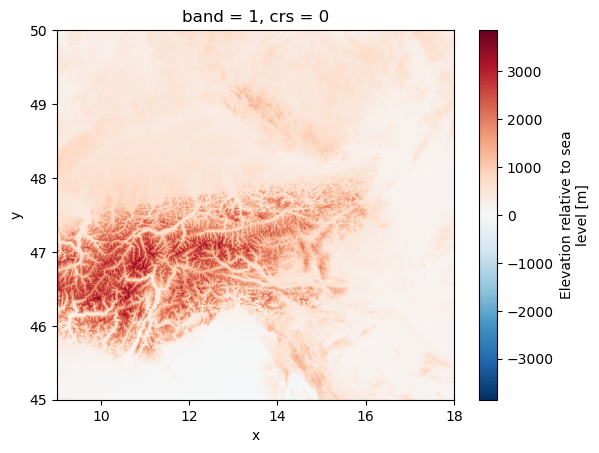

In [12]:
ds.plot()

<AxesSubplot: >

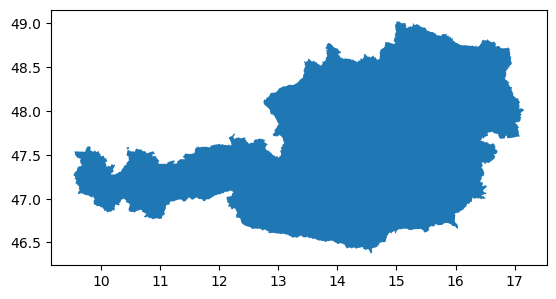

In [13]:
place_name = "Austria"
area = ox.geocode_to_gdf(place_name)
area.plot()

In [14]:
area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   geometry      1 non-null      geometry
 1   bbox_north    1 non-null      float64 
 2   bbox_south    1 non-null      float64 
 3   bbox_east     1 non-null      float64 
 4   bbox_west     1 non-null      float64 
 5   place_id      1 non-null      int64   
 6   osm_type      1 non-null      object  
 7   osm_id        1 non-null      int64   
 8   lat           1 non-null      float64 
 9   lon           1 non-null      float64 
 10  display_name  1 non-null      object  
 11  class         1 non-null      object  
 12  type          1 non-null      object  
 13  importance    1 non-null      float64 
dtypes: float64(7), geometry(1), int64(2), object(4)
memory usage: 240.0+ bytes


<AxesSubplot: title={'center': 'band = 1, crs = 0'}, xlabel='x', ylabel='y'>

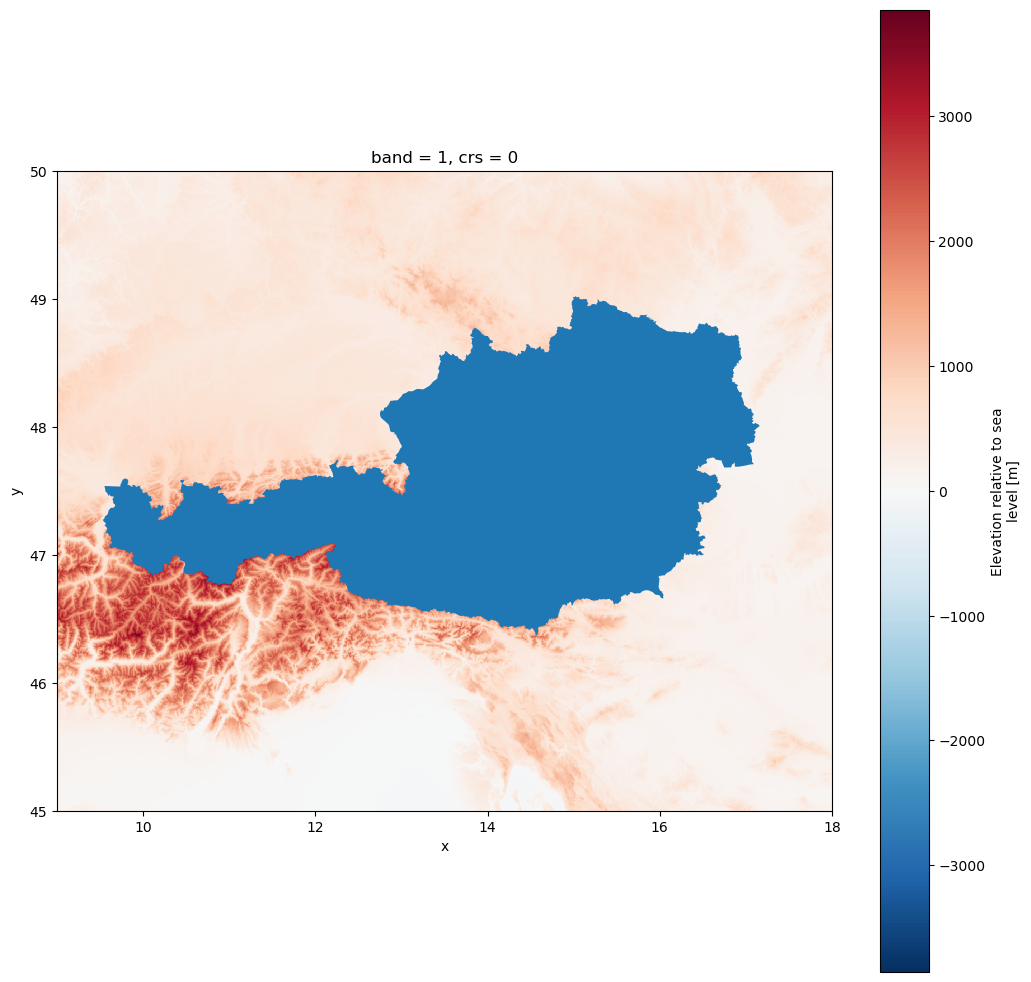

In [16]:
fig, ax = plt.subplots(figsize = (12.5, 12.5))

ds.plot(ax = ax)
area.plot(ax = ax)

In [17]:
clipped = ds.rio.clip(area.geometry.values, area.crs)
clipped

MissingCRS: CRS not found. Please set the CRS with 'rio.write_crs()'. Data variable: elevation